## Instructions
1. Paste raw training console output for each run into the parsing cell below (lines containing 'Epoch X/').
2. If you have per-epoch timing already, fill `aws_epoch_times` directly.
3. (Optional) If you later obtain validation accuracies, set the `accuracies` list and rerun stats cells.

## Placeholder Validation Accuracies (Runs 1–5)
Currently unknown. Using NaN values to keep statistical pipeline intact.

In [1]:
import numpy as np, pandas as pd
# AWS run final validation accuracies (runs 1–5)
accuracies = [0.9988, 0.9991, 0.9990, 0.9992, 0.9988]  # val_accuracy from last epoch of each run
accuracies

[0.9988, 0.9991, 0.999, 0.9992, 0.9988]

## Accuracy Statistical Summary (Placeholder)

In [2]:
arr = np.array(accuracies, dtype=float)
summary_cols = {}
if np.isnan(arr).all():
    summary = pd.DataFrame({'Note':['All accuracy values missing; supply data to compute stats.']})
else:
    mean_val = np.nanmean(arr)
    pop_std = np.nanstd(arr, ddof=0)
    samp_std = np.nanstd(arr, ddof=1)
    min_val = np.nanmin(arr)
    max_val = np.nanmax(arr)
    range_val = max_val - min_val
    cv = pop_std / mean_val if mean_val else np.nan
    summary = pd.DataFrame({'Mean %':[mean_val],'Min %':[min_val],'Max %':[max_val],'Range pp':[range_val],'Sample Std pp':[samp_std],'Population Std pp':[pop_std],'Coeff Variation':[cv]})
summary

,Mean %,Min %,Max %,Range pp,Sample Std pp,Population Std pp,Coeff Variation
0,0.99898,0.9988,0.9992,0.0004,0.000179,0.00016,0.00016


### Epoch Timing Data (Placeholder)
Provide per-epoch duration (seconds) arrays for each AWS run. If unavailable, leave as given and update later.

In [3]:
# Insert actual epoch durations for AWS runs 1–5.
aws_epoch_times = {
    'aws_run1':[58,57,57,57,53,53,53,57,53,53],
    'aws_run2':[54,54,82,54,54,57,57,82,57,54],
    'aws_run3':[55,54,57,57,54,57,57,54,53,54],
    'aws_run4':[55,54,54,54,54,53,54,82,57,82],
    'aws_run5':[54,54,53,54,57,57,54,53,53,54],
}
# Build dataframe only if any times present
rows = []
for run, times in aws_epoch_times.items():
    for i,t in enumerate(times, start=1):
        rows.append({'run': run, 'epoch': i, 'seconds': t})
df_times = pd.DataFrame(rows)
if df_times.empty:
    print('No epoch timing data supplied yet. Populate aws_epoch_times to enable statistics.')
else:
    run_stats = df_times.groupby('run')['seconds'].agg(['mean','std','min','max'])
    all_mean = df_times['seconds'].mean()
    all_median = df_times['seconds'].median()
    all_std = df_times['seconds'].std()
    typical_pct = df_times['seconds'].between(df_times['seconds'].quantile(0.10), df_times['seconds'].quantile(0.90)).mean()*100
    print(f'Aggregate mean: {all_mean:.2f}s  median: {all_median:.2f}s  std: {all_std:.2f}s  central(10-90%) coverage: {typical_pct:.1f}%')
    display(run_stats)

Aggregate mean: 57.00s  median: 54.00s  std: 7.61s  central(10-90%) coverage: 90.0%


,mean,std,min,max
run,,,,
aws_run1,55.1,2.233582,53,58
aws_run2,60.5,11.413929,54,82
aws_run3,55.2,1.619328,53,57
aws_run4,59.9,11.694728,53,82
aws_run5,54.3,1.494434,53,57


### Timing Plots (Generated When Data Available)

/var/folders/2x/9_v8gq357w35fmsfsmdm9dq40000gn/T/ipykernel_80378/1095904268.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(filtered, labels=[r for r in order if aws_epoch_times[r]], vert=True, showfliers=True)


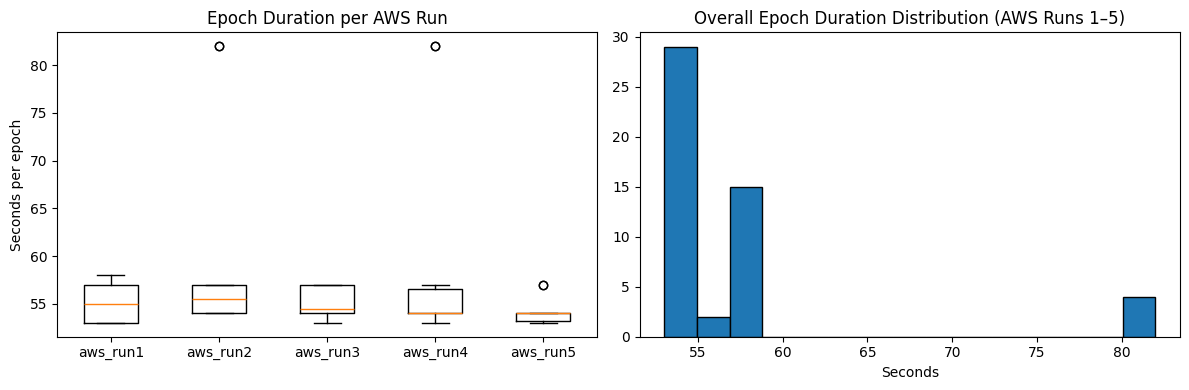

In [4]:
import matplotlib.pyplot as plt
if df_times.empty:
    print('Skip plotting: no timing data.')
else:
    plt.figure(figsize=(12,4))
    order = list(aws_epoch_times.keys())
    filtered = [aws_epoch_times[r] for r in order if aws_epoch_times[r]]
    if filtered:
        plt.subplot(1,2,1)
        plt.boxplot(filtered, labels=[r for r in order if aws_epoch_times[r]], vert=True, showfliers=True)
        plt.ylabel('Seconds per epoch')
        plt.title('Epoch Duration per AWS Run')
        plt.subplot(1,2,2)
        plt.hist(df_times['seconds'], bins=min(15, max(5, len(df_times)//2)), edgecolor='black')
        plt.xlabel('Seconds')
        plt.title('Overall Epoch Duration Distribution (AWS Runs 1–5)')
        plt.tight_layout()
        plt.show()
    else:
        print('No non-empty run lists for plotting.')

## Interpretation (Guidance Without Data)
- Accuracy metrics pending; cannot assess performance spread until provided.
- Expect similar timing improvement strategies as Azure: increase batch size, optimize input pipeline, reduce overhead.
- Once epoch times are added, compute mean, variability, and identify outliers (long epochs indicating potential system contention).

## Recommendations (Pre-Data)
1. Capture console logs for each run (redirect stdout to a file).
2. Parse epoch durations with regex: `r'Epoch \d+/\d+.*?(\d+)s'` or extract the time token preceding 'ms/step'.
3. Provide validation accuracy lines to enable comparative analysis vs Azure results.
4. Standardize batch size across runs to isolate instance performance differences.
5. Use CloudWatch metrics (CPUUtilization, NetworkIn/Out) to correlate slow epochs with resource contention.